In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df=pd.read_excel('Chapter5_NPV_DataSet.xlsx')

In [3]:
df.describe()

,Lateral_length,Stage_length,Sand_to_water_ratio,Sand_per_ft,Water_per_ft,EUR_BCF,NPV_at_3.0_MMBTU_Gas Pricing
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,8911.663566,223.834920,1.268741,2066.112041,39.069433,9.795406,-0.634117
std,2995.195633,52.900698,0.338050,903.288312,15.740073,6.193401,3.631055
min,2439.500000,85.600003,0.119433,310.728368,8.118385,0.173786,-8.092757
25%,6433.225000,178.830607,1.108849,1416.164360,26.593500,5.212174,-3.107133
50%,8089.450000,204.708946,1.249180,2027.515360,40.575506,8.570267,-1.587870
75%,11582.100000,263.308520,1.437271,2777.796760,51.229328,12.465853,1.061966
max,16918.400000,386.754534,2.442476,4964.854720,75.340213,37.375668,13.828945


In [4]:
df.columns

Index(['Lateral_length', 'Stage_length', 'Sand_to_water_ratio', 'Sand_per_ft',
       'Water_per_ft', 'EUR_BCF', 'NPV_at_3.0_MMBTU_Gas Pricing'],
      dtype='object')

In [5]:
x=df.drop(['NPV_at_3.0_MMBTU_Gas Pricing'], axis=1)
y=df['NPV_at_3.0_MMBTU_Gas Pricing']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
from xgboost import XGBRegressor

In [9]:
np.random.seed(seed)
xgb=XGBRegressor(objective ='reg:squarederror',n_estimators=200, reg_lambda=1, gamma=0,max_depth=3,
                 learning_rate = 0.1, reg_alpha = 0.1)

In [10]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0.1,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
y_pred_train=xgb.predict(X_train)
y_pred_test=xgb.predict(X_test)

In [12]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9957 R= 0.9979


In [13]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.9138 R= 0.9559


Text(0.5, 1.0, 'NPV Training Actual Vs. Prediction')

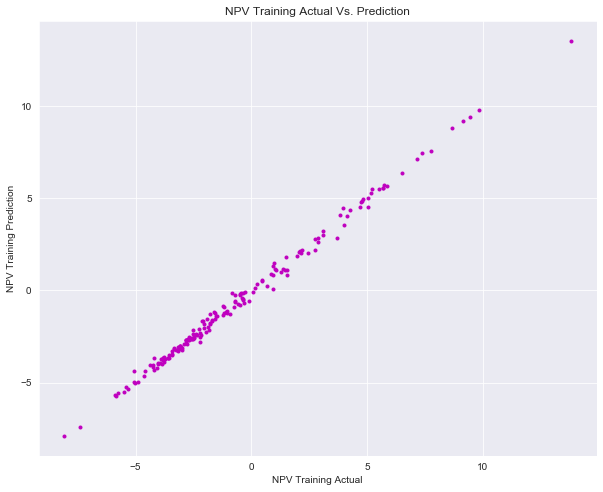

In [14]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'm.')
plt.xlabel('NPV Training Actual')
plt.ylabel('NPV Training Prediction')
plt.title('NPV Training Actual Vs. Prediction')

Text(0.5, 1.0, 'NPV Testing Actual Vs. Prediction')

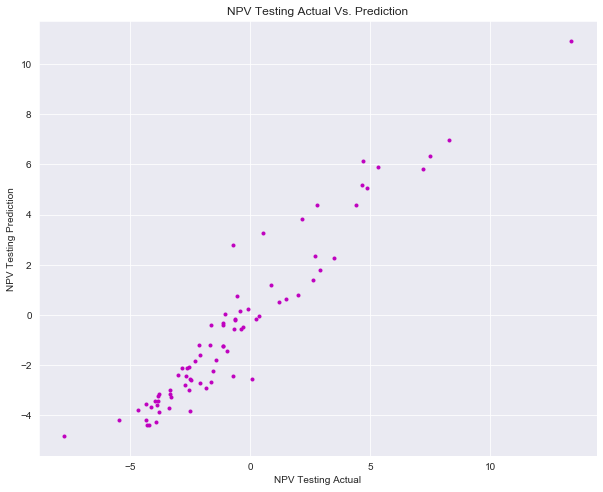

In [15]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'm.')
plt.xlabel('NPV Testing Actual')
plt.ylabel('NPV Testing Prediction')
plt.title('NPV Testing Actual Vs. Prediction')

In [16]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.76634
MSE: 1.0761
RMSE: 1.03735


Text(0.5, 1.0, 'Feature Importance Ranking')

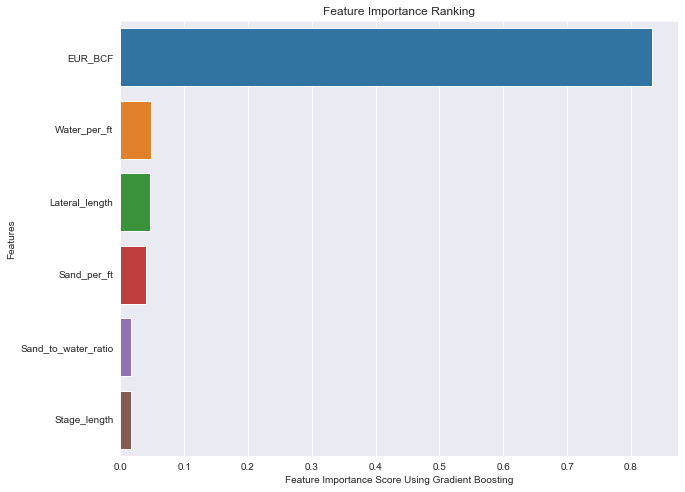

In [17]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(xgb.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Gradient Boosting')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
np.random.seed(seed)
scores_R2 = cross_val_score(xgb, x, y,cv=10,scoring='r2')

In [20]:
print(" R2_Cross-validation scores: {}". format( scores_R2))

 R2_Cross-validation scores: [0.89722326 0.86415599 0.79374482 0.94312108 0.94706938 0.88140055
 0.52043121 0.94923754 0.92307646 0.81054857]


In [21]:
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores: 0.8530008849657191


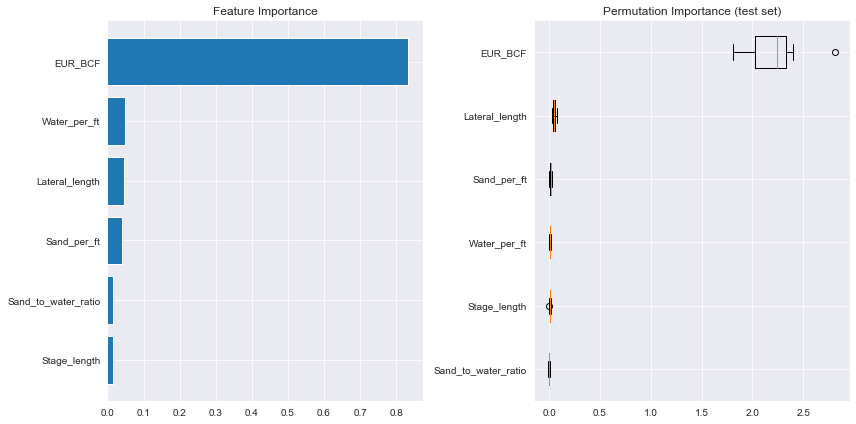

In [22]:
from sklearn.inspection import permutation_importance
feature_importance = xgb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(xgb, X_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()